In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
import pickle
import itertools as it
import os
import sys
sys.path.insert(0, '/work/08811/aew492/frontera/small-scale_cross-corrs')
from illustris_sim import TNGSim
import tools
from xcorr_cases import SPHEREx_Xcorr

### angular cross-correlation, photometric x spectroscopic galaxies

In [3]:
# main inputs
snapshotss = [
    np.arange(25, 37),  # center at z=2.3
    np.arange(43, 58), # center at z=1.
    np.arange(59, 76) # center at z~0.4
]
# the 5 redshift error bins in SPHEREx
sigma_zs = [
    0.003,
    0.01,
    0.03,
    0.1,
    0.2
]

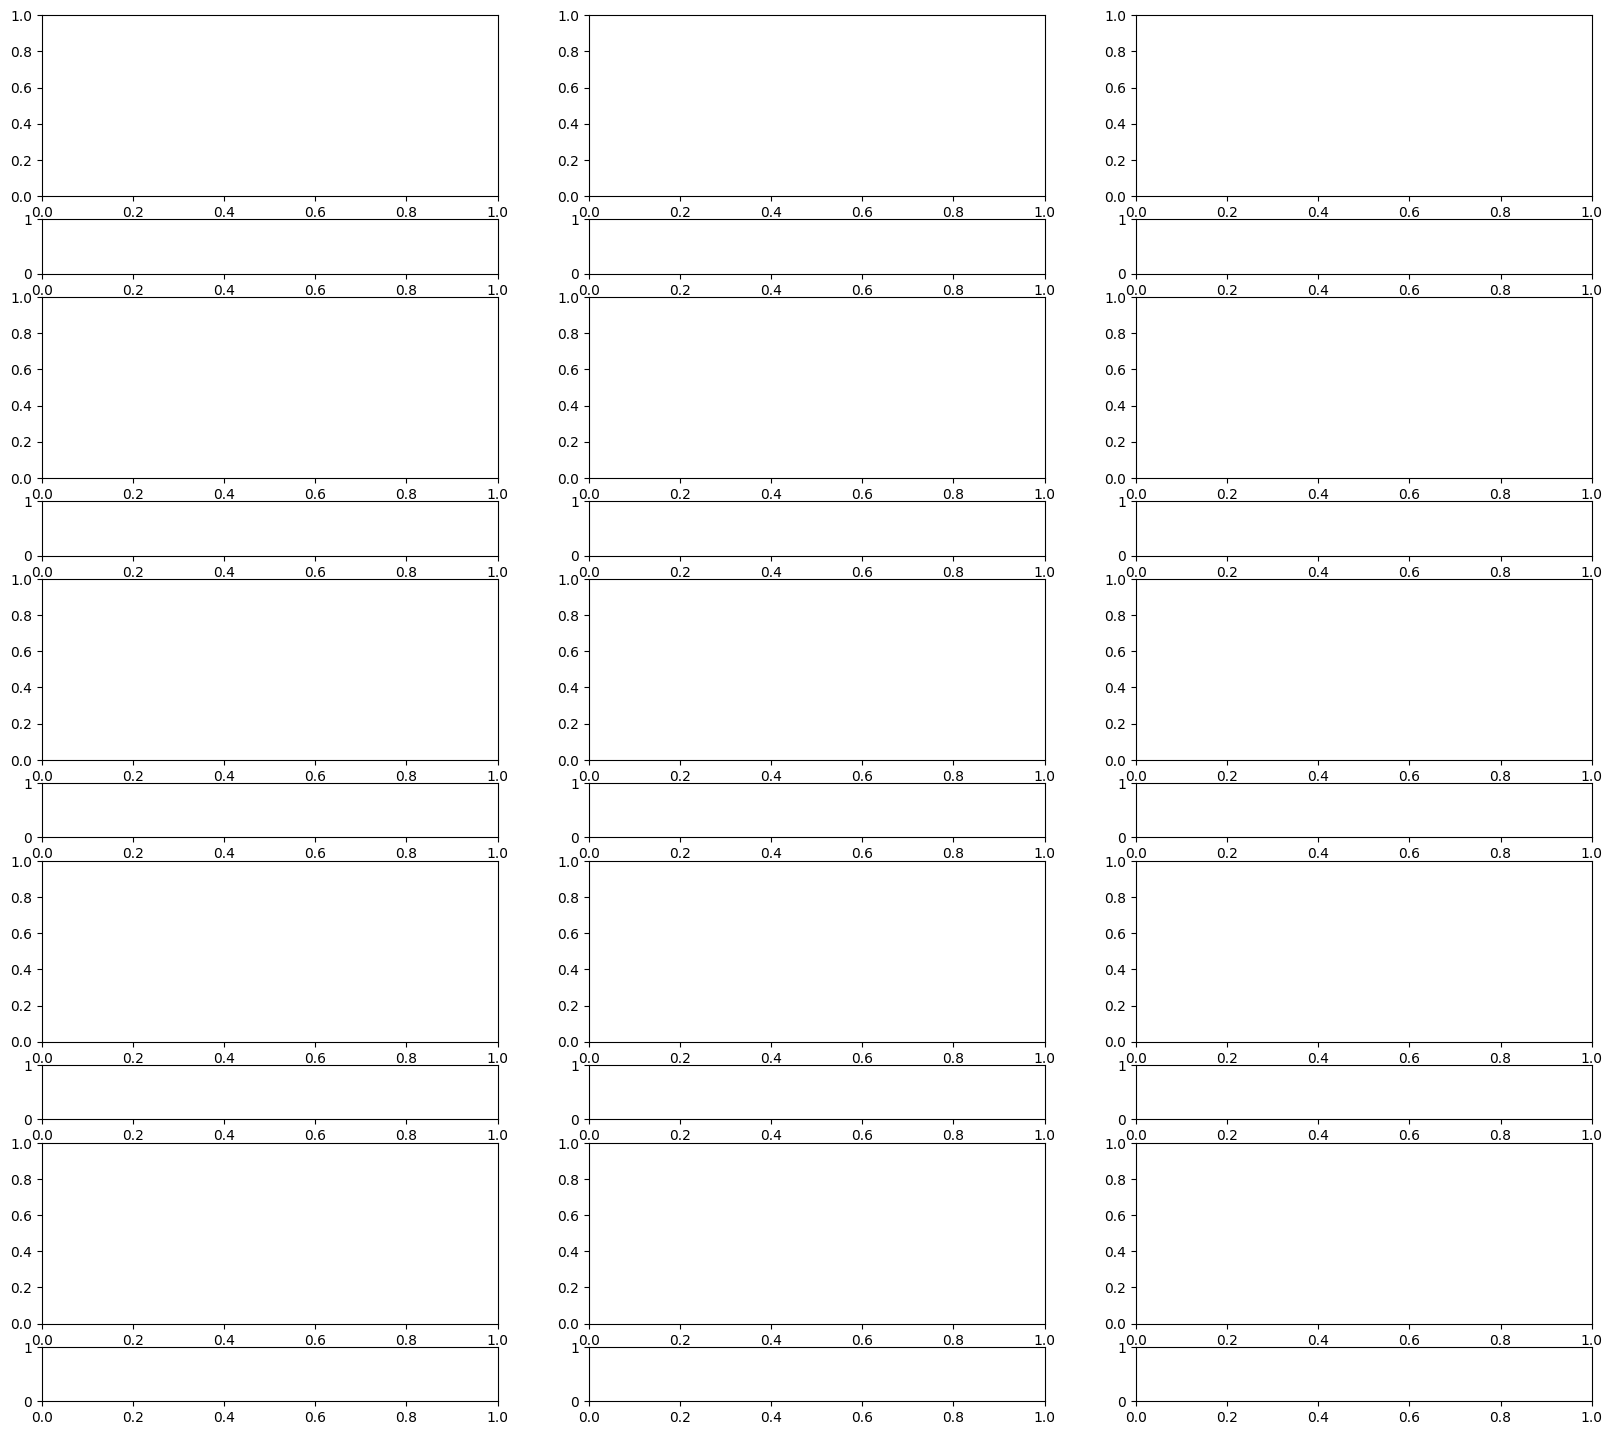

In [13]:

for i, snapshots in enumerate(snapshotss):
    for j, sigma_z in enumerate(sigma_zs):
        ax0 = fig.add_subplot(gs[j*2, i])
        ax1 = fig.add_subplot(gs[j*2+1, i])

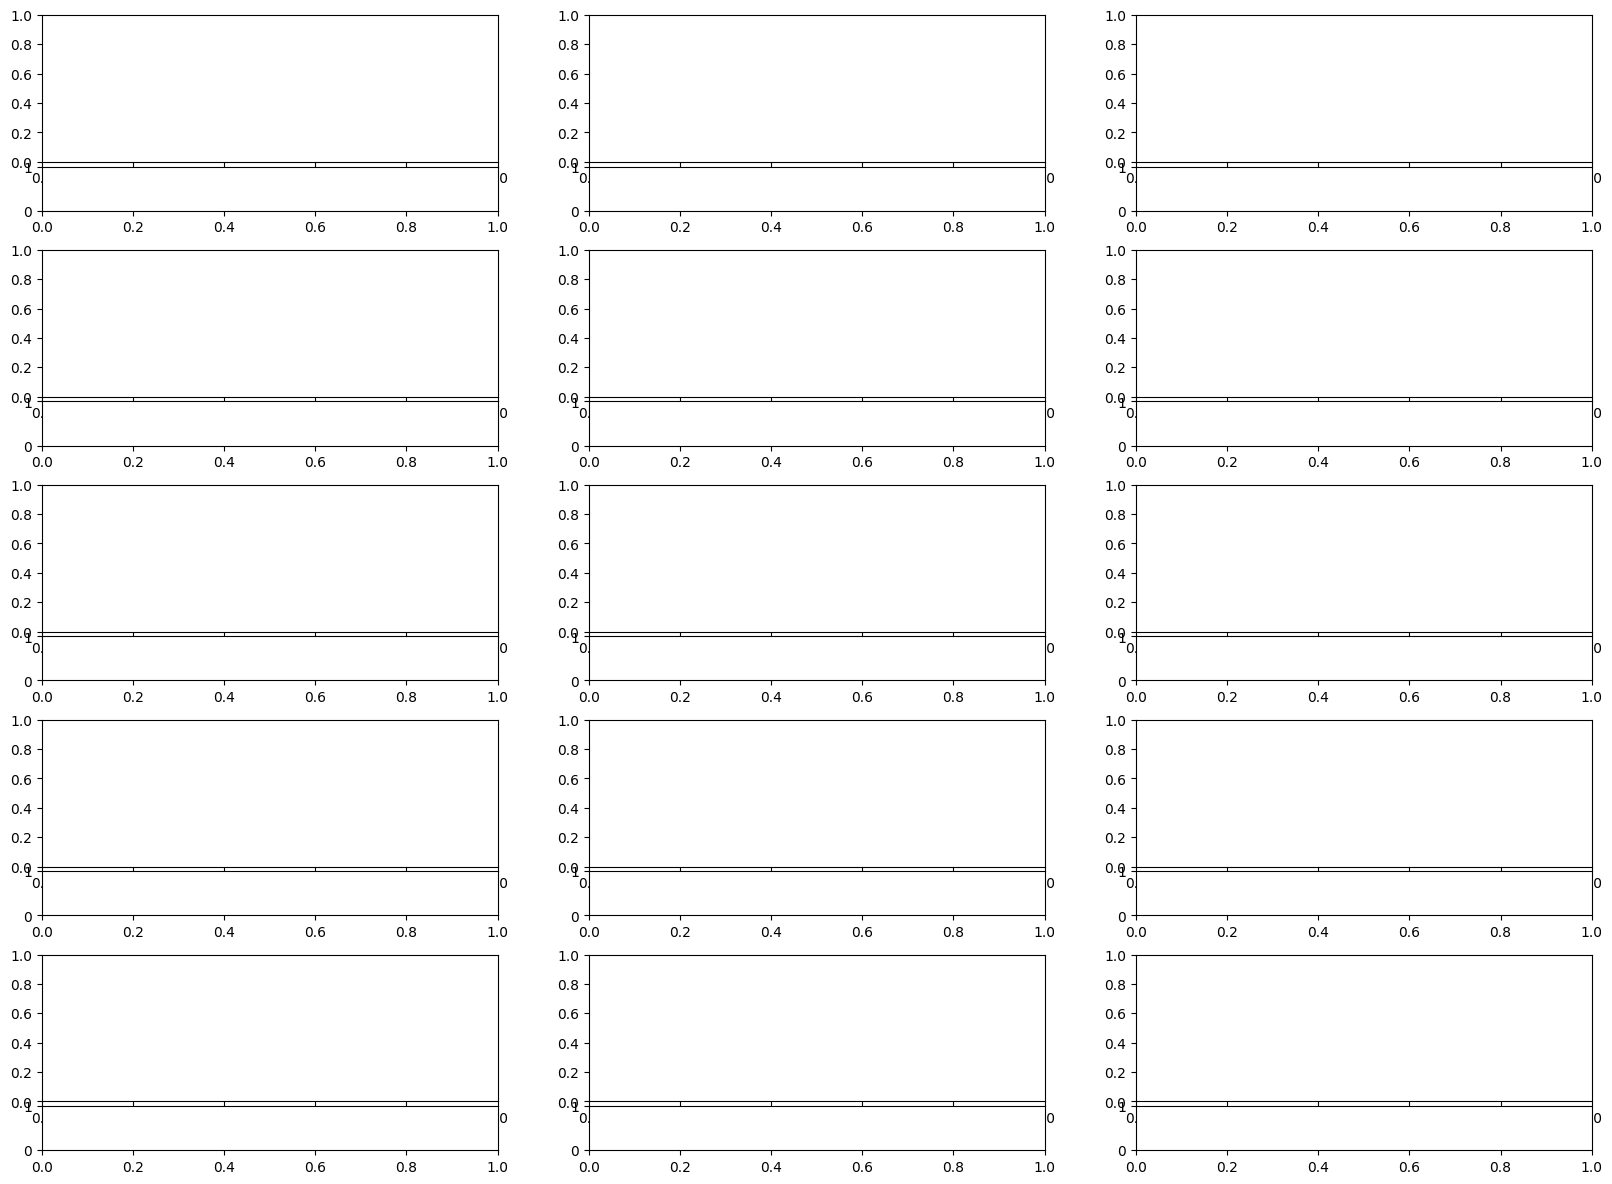

In [22]:
fig = plt.figure(figsize=(len(sigma_zs)*4, len(snapshotss)*10))
outer_gs = mpl.gridspec.GridSpec(len(sigma_zs)*2, len(snapshotss), hspace=0.2)

for i, snapshots in enumerate(snapshotss):
    for j, sigma_z in enumerate(sigma_zs):
        gs = mpl.gridspec.GridSpecFromSubplotSpec(2, 1, outer_gs[j,i], height_ratios=[1,.3], hspace=.05)
        ax0 = fig.add_subplot(gs[0])
        ax1 = fig.add_subplot(gs[1])

/work/08811/aew492/frontera/venv/illustris/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


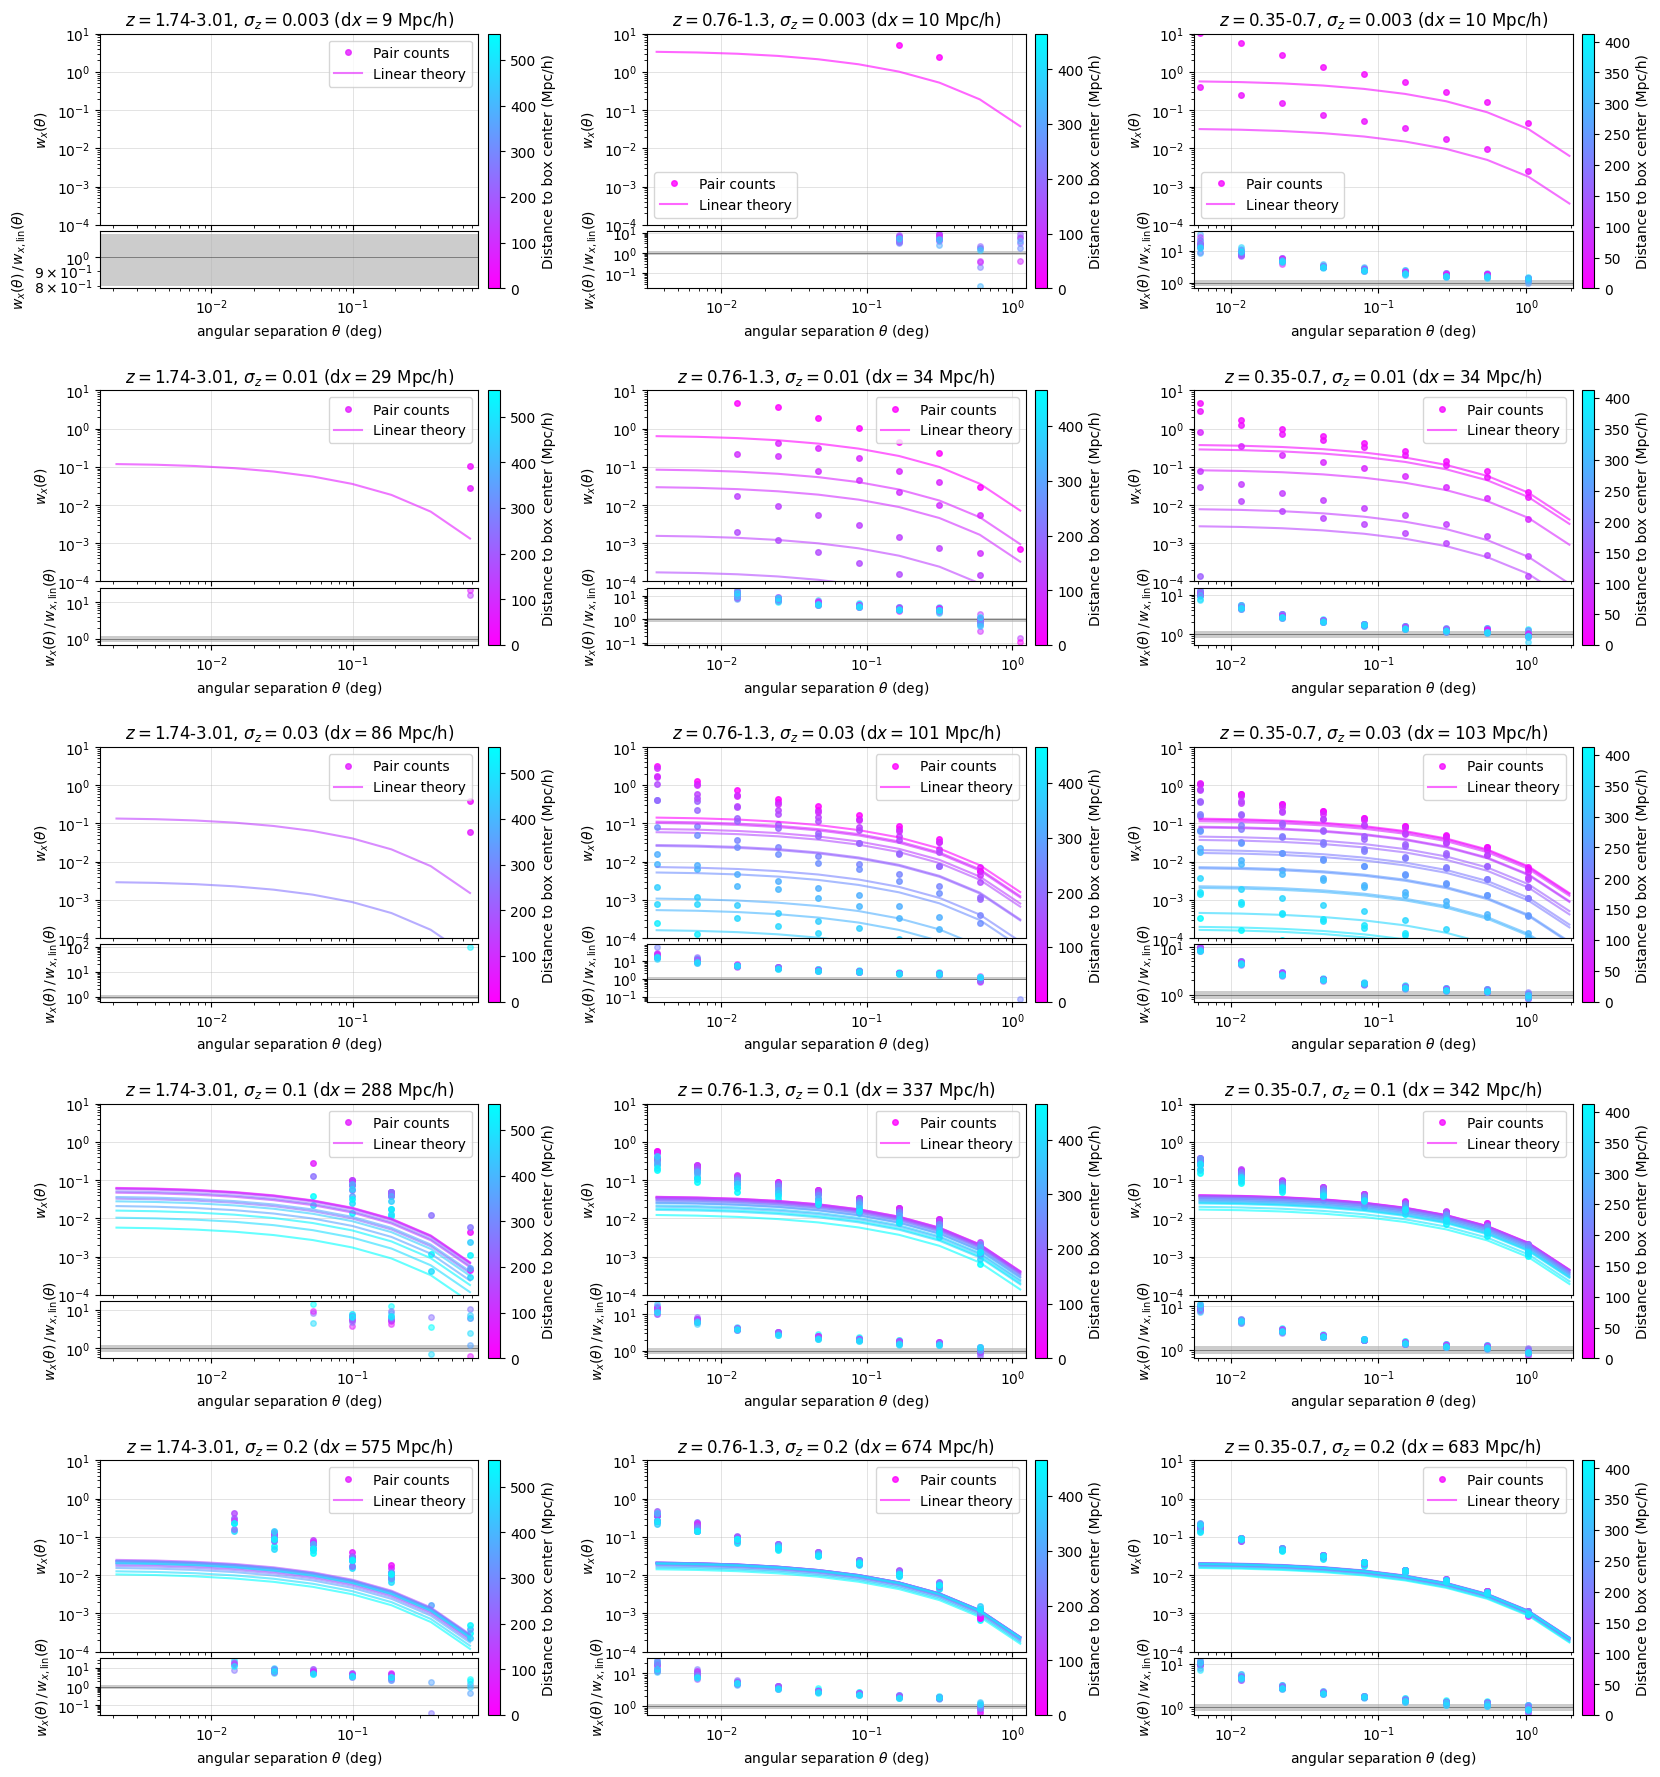

In [27]:
# grid of cross-correlations

# figure
#fig, axs = plt.subplots(len(sigma_zs), len(snapshotss), figsize=(len(sigma_zs)*4, len(snapshotss)*3))
fig = plt.figure(figsize=(len(sigma_zs)*4, len(snapshotss)*15))
outer_gs = mpl.gridspec.GridSpec(len(sigma_zs)*2, len(snapshotss), hspace=0.4)

for i, snapshots in enumerate(snapshotss):
    for j, sigma_z in enumerate(sigma_zs):
        
        # subplot
        gs = mpl.gridspec.GridSpecFromSubplotSpec(2, 1, outer_gs[j,i], height_ratios=[1,.3], hspace=.05)
        ax0 = fig.add_subplot(gs[0])
        ax1 = fig.add_subplot(gs[1])
        
        # load results
        # instantiate spherex set to get redshifts
        X = SPHEREx_Xcorr(snapshots, sigma_z, density_type='fixed')
        fn = os.path.join(X.scratch, 'TNG300-3/xcorr_res', f'xcorr_z-{min(X.redshifts):.2f}-{max(X.redshifts):.2f}' + \
                          f'_sigma-z-{X.sigma_z}_ns-{X.density_type}.pkl')
        del X
        with open(fn, 'rb') as file:
            Q = pickle.load(file)
        
        # plot
        norm = mpl.colors.Normalize(vmin=0, vmax=np.amax(np.abs(Q.chis-Q.central_chi).value))
        smap = mpl.cm.ScalarMappable(norm=norm, cmap='cool_r')
        #fig = plt.figure(figsize=(9,6))
        #gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1,0.3], hspace=0.05)

        for k, w in enumerate(Q.wthetax):
            kwargs = dict(c=smap.to_rgba(np.abs(Q.chis[k] - Q.central_chi).value))
            label = 'Pair counts' if k==len(Q.wthetax)//2 else ''
            ax0.plot(Q.theta_avg, w, marker='o', ms=4, ls='None', alpha=0.8, label=label, **kwargs)
            label = 'Linear theory' if k==len(Q.wthetax)//2 else ''
            ax0.plot(Q.theta_avg, Q.wthetax_lin[k], alpha=0.6, label=label, **kwargs)
        # secax = ax0.secondary_xaxis('top', functions=(theta_to_r_comov_, r_comov_to_theta_))
        # secax.set_xlabel(r'separation $r_p$ (Mpc/h)')
        ax0.set_ylim(1e-4,1e1)
        ax0.set_ylabel(r'$w_x(\theta)$')
        ax0.legend()

        ax1.axhline(1., c='k', alpha=0.5, lw=0.5)
        for k, w in enumerate(Q.wthetax):
            ax1.plot(Q.theta_avg, w / Q.wthetax_lin[k], marker='o', ms=4, alpha=0.5, ls='None',
                     c=smap.to_rgba(np.abs(Q.chis[k] - Q.central_chi).value))
        ax1.axhspan(0.8, 1.2, facecolor='k', alpha=0.2)
        ax1.set_ylabel(r'$w_x(\theta)\,/\,w_{x,\mathrm{lin}}(\theta)$')
        ax1.set_xlabel(r'angular separation $\theta$ (deg)')

        for ax in (ax0, ax1):
            ax.loglog()
            ax.grid(alpha=0.5, lw=0.5)
            ax.set_xlim(min(Q.theta_avg)-5e-4, max(Q.theta_avg)+1e-1)

        fig.colorbar(smap, ax=[ax0,ax1], label='Distance to box center (Mpc/h)', pad=0.02)
        ax0.set_title(r'$z=$'f'{min(Q.redshifts)}-{max(Q.redshifts)}, ' + \
                     r'$\sigma_z=$'f'{Q.sigma_z} (d'r'$x=$'f'{Q.dx.value:.0f} Mpc/h)')
                     #x=0.45, y=0.95)
#fig.suptitle('Photometric x spectroscopic cross-correlations', y=.9)

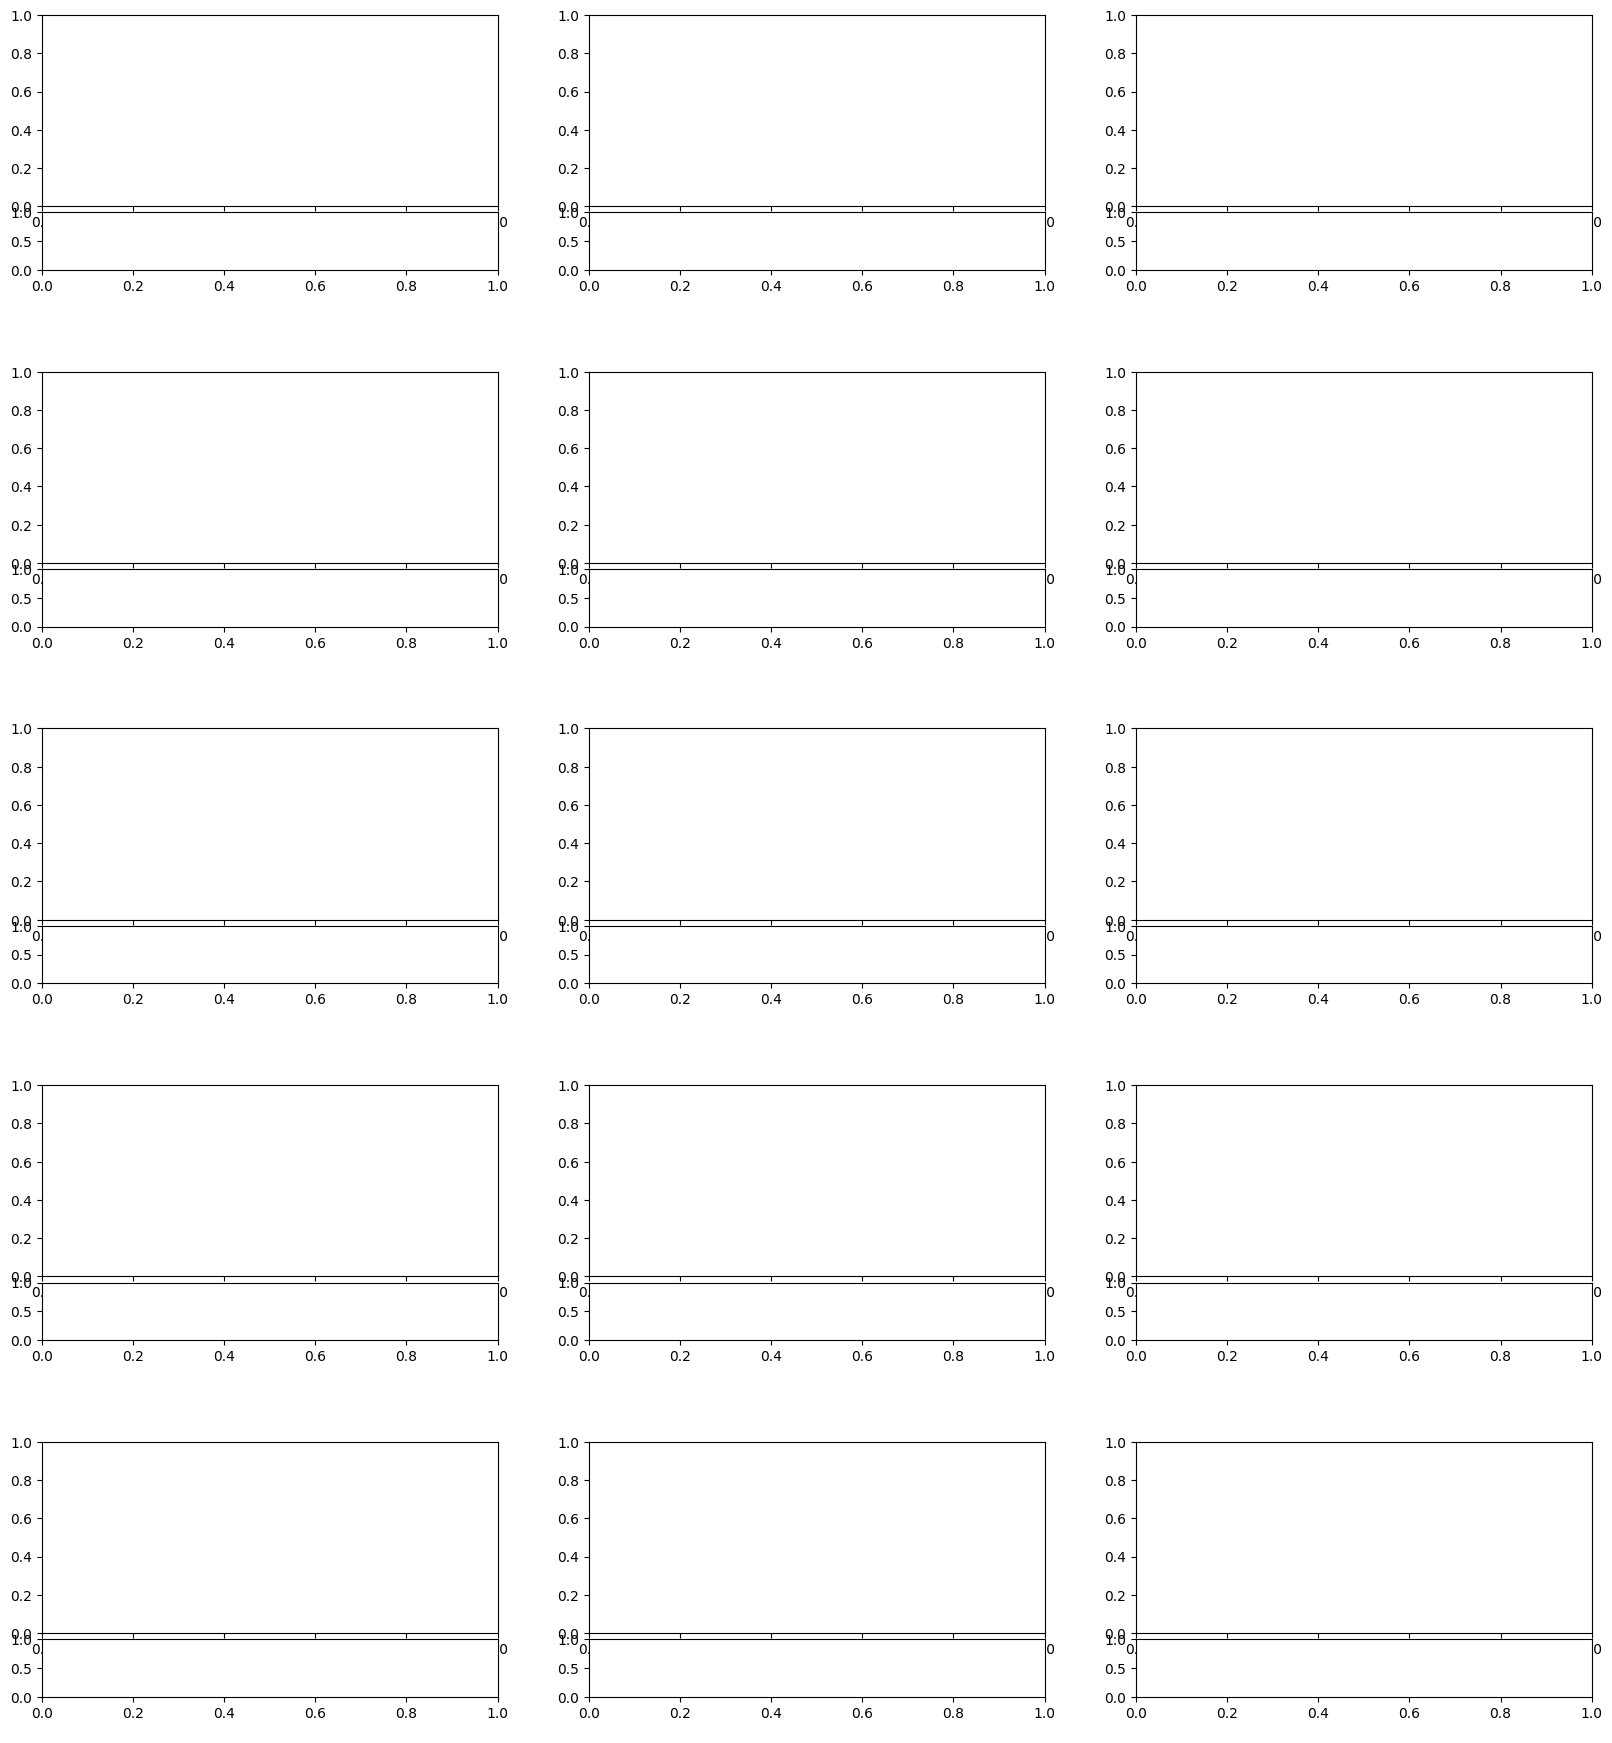

In [49]:
fig = plt.figure(figsize=(len(sigma_zs)*4, len(snapshotss)*15))
outer_gs = mpl.gridspec.GridSpec(len(sigma_zs)*2, len(snapshotss), hspace=0.4)

for i, snapshots in enumerate(snapshotss):
    for j, sigma_z in enumerate(sigma_zs):
        
        # subplot
        gs = mpl.gridspec.GridSpecFromSubplotSpec(2, 1, outer_gs[j,i], height_ratios=[1,.3], hspace=.05)
        ax0 = fig.add_subplot(gs[0])
        ax1 = fig.add_subplot(gs[1])
        
        # load results
        # instantiate spherex set to get redshifts
        X = SPHEREx_Xcorr(snapshots, sigma_z, density_type='fixed', density=2e-3)
        fn = os.path.join(X.scratch, 'TNG300-3/xcorr_res', f'xcorr_z-{min(X.redshifts):.2f}-{max(X.redshifts):.2f}' + \
                          f'_sigma-z-{X.sigma_z}_ns-{X.density_type}_{X.density.value:.1e}.pkl')
        del X
        with open(fn, 'rb') as file:
            Q = pickle.load(file)
            
        # label rows and columns
        if j == 0:
            ax0.text(0.5, 1.2, r'$z=$'f'{min(Q.redshifts)}-{max(Q.redshifts)}',
                     ha='center', va='center', fontsize=15, transform=ax.transAxes)
        if i == 0:
            ax0.text(-0.2, 0.3, r'$\sigma_z=$'f'{Q.sigma_z}',
                     ha='center', va='center', fontsize=15, rotation=90, transform=ax.transAxes)

/work/08811/aew492/frontera/venv/illustris/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


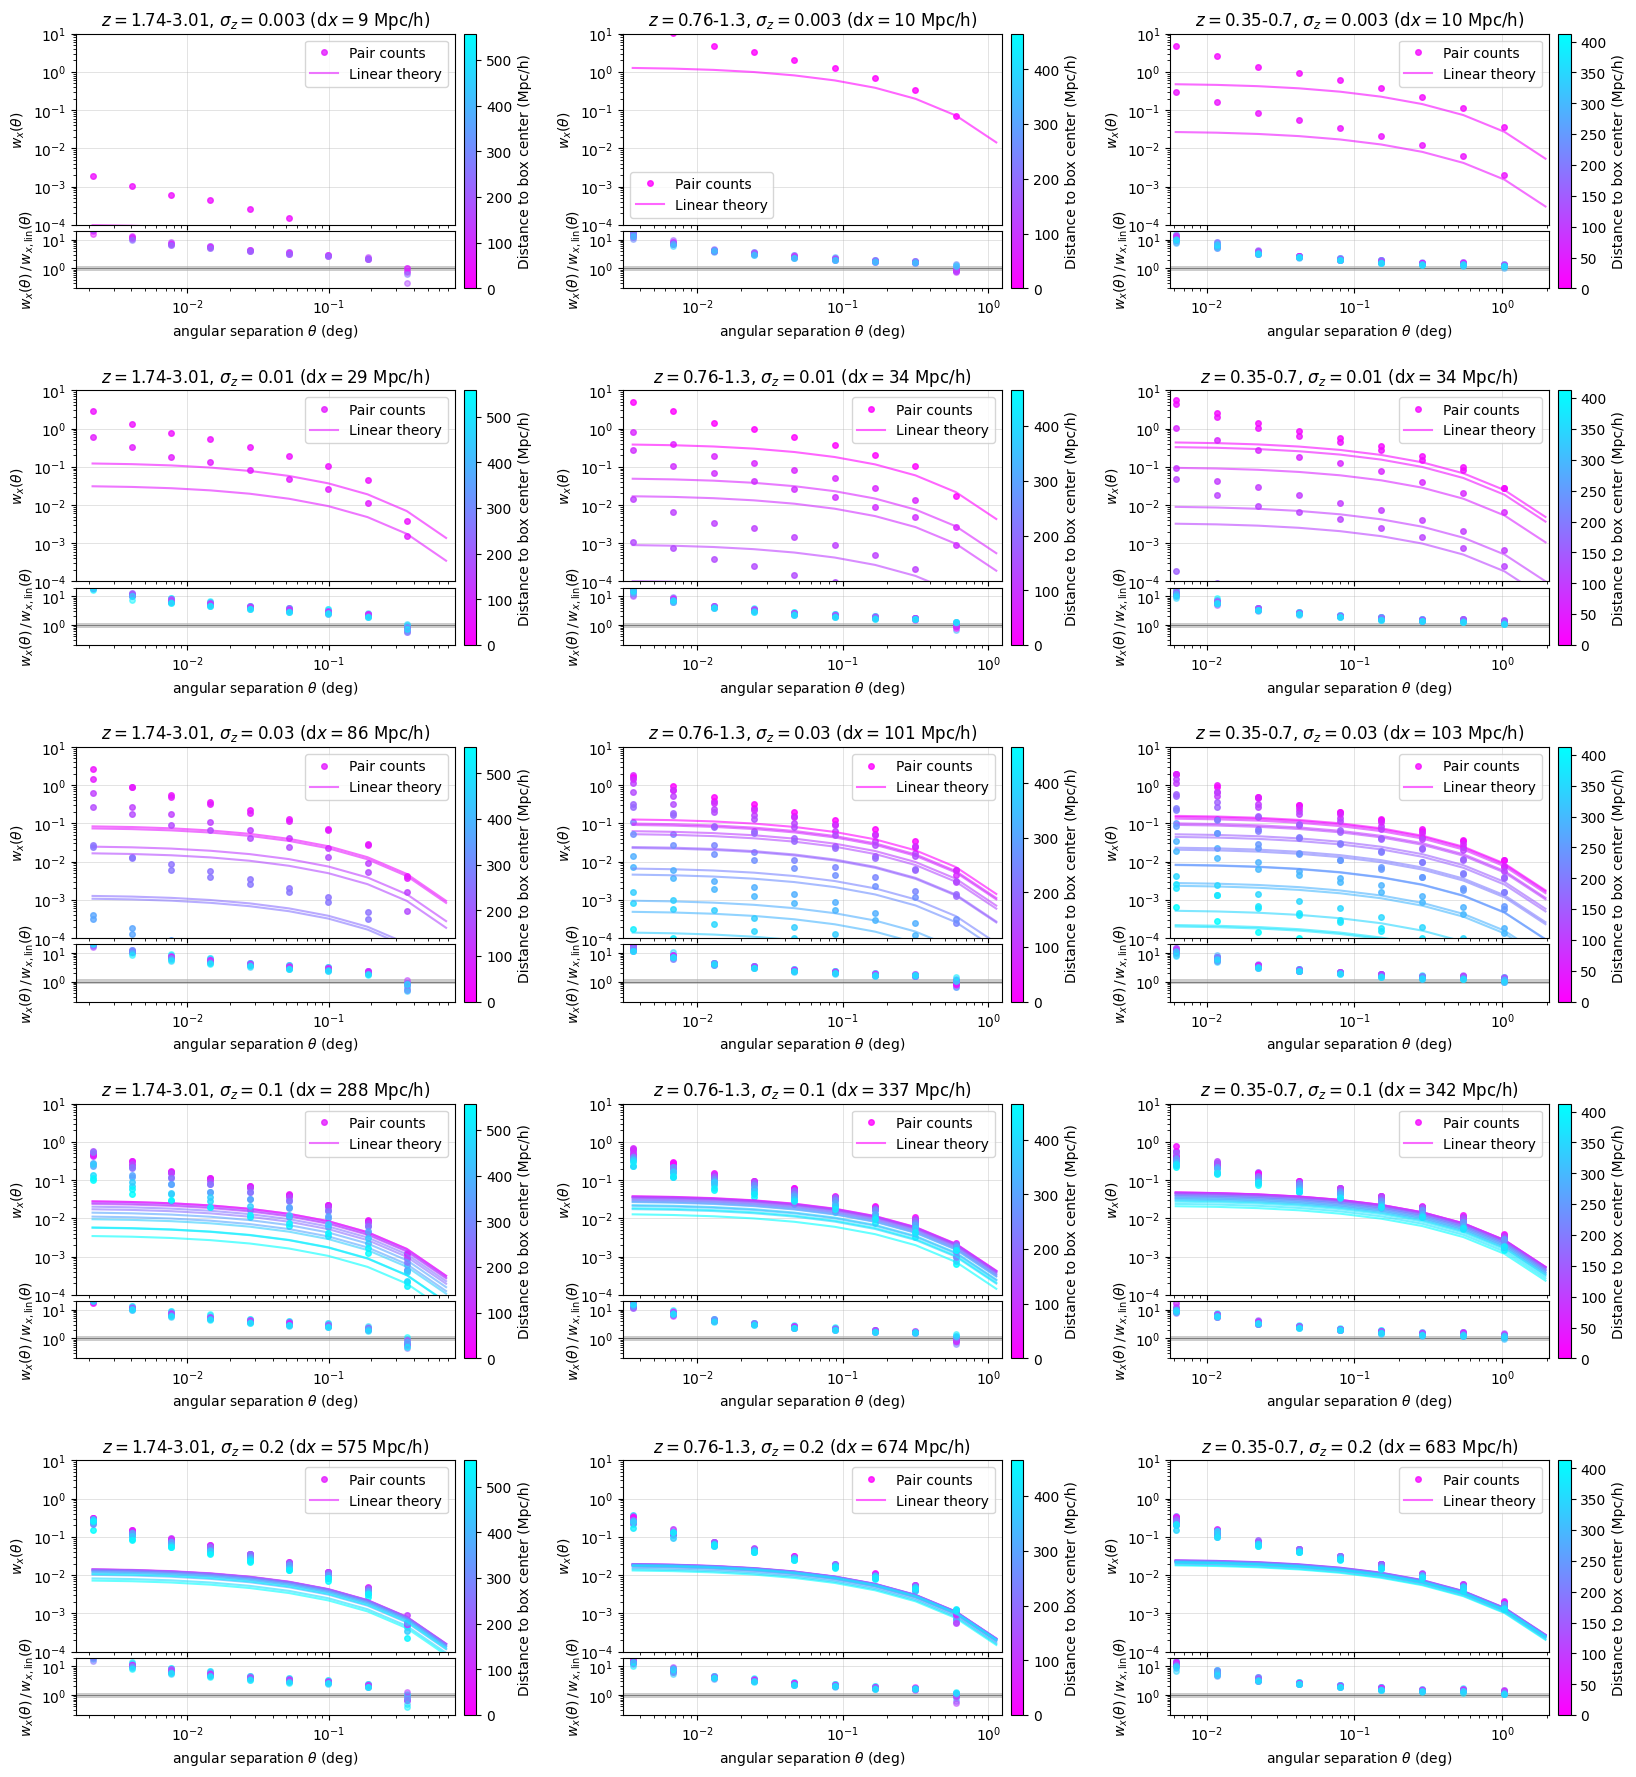

In [51]:
# grid of cross-correlations

# figure
#fig, axs = plt.subplots(len(sigma_zs), len(snapshotss), figsize=(len(sigma_zs)*4, len(snapshotss)*3))
fig = plt.figure(figsize=(len(sigma_zs)*4, len(snapshotss)*15))
outer_gs = mpl.gridspec.GridSpec(len(sigma_zs)*2, len(snapshotss), hspace=0.4)

for i, snapshots in enumerate(snapshotss):
    for j, sigma_z in enumerate(sigma_zs):
        
        # subplot
        gs = mpl.gridspec.GridSpecFromSubplotSpec(2, 1, outer_gs[j,i], height_ratios=[1,.3], hspace=.05)
        ax0 = fig.add_subplot(gs[0])
        ax1 = fig.add_subplot(gs[1])
        
        # load results
        # instantiate spherex set to get redshifts
        X = SPHEREx_Xcorr(snapshots, sigma_z, density_type='fixed', density=2e-3)
        fn = os.path.join(X.scratch, 'TNG300-3/xcorr_res', f'xcorr_z-{min(X.redshifts):.2f}-{max(X.redshifts):.2f}' + \
                          f'_sigma-z-{X.sigma_z}_ns-{X.density_type}_{X.density.value:.1e}.pkl')
        del X
        with open(fn, 'rb') as file:
            Q = pickle.load(file)
            
        # label rows and columns
        #if j == 0:
        #    ax0.text(0.5, 1.2, r'$z=$'f'{min(Q.redshifts)}-{max(Q.redshifts)}',
        #             ha='center', va='center', fontsize=15, transform=ax.transAxes)
        #if i == 0:
        #    ax0.text(-0.2, 0.3, r'$\sigma_z=$'f'{Q.sigma_z}',
        #             ha='center', va='center', fontsize=15, rotation=90, transform=ax.transAxes)
        
        # plot
        norm = mpl.colors.Normalize(vmin=0, vmax=np.amax(np.abs(Q.chis-Q.central_chi).value))
        smap = mpl.cm.ScalarMappable(norm=norm, cmap='cool_r')
        #fig = plt.figure(figsize=(9,6))
        #gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1,0.3], hspace=0.05)

        for k, w in enumerate(Q.wthetax):
            kwargs = dict(c=smap.to_rgba(np.abs(Q.chis[k] - Q.central_chi).value))
            label = 'Pair counts' if k==len(Q.wthetax)//2 else ''
            ax0.plot(Q.theta_avg, w, marker='o', ms=4, ls='None', alpha=0.8, label=label, **kwargs)
            label = 'Linear theory' if k==len(Q.wthetax)//2 else ''
            ax0.plot(Q.theta_avg, Q.wthetax_lin[k], alpha=0.6, label=label, **kwargs)
        # secax = ax0.secondary_xaxis('top', functions=(theta_to_r_comov_, r_comov_to_theta_))
        # secax.set_xlabel(r'separation $r_p$ (Mpc/h)')
        ax0.set_ylim(1e-4,1e1)
        ax0.set_ylabel(r'$w_x(\theta)$')
        ax0.legend()

        ax1.axhline(1., c='k', alpha=0.5, lw=0.5)
        for k, w in enumerate(Q.wthetax):
            ax1.plot(Q.theta_avg, w / Q.wthetax_lin[k], marker='o', ms=4, alpha=0.5, ls='None',
                     c=smap.to_rgba(np.abs(Q.chis[k] - Q.central_chi).value))
        ax1.axhspan(0.8, 1.2, facecolor='k', alpha=0.2)
        ax1.set_ylim(2e-1, 2e1)
        ax1.set_ylabel(r'$w_x(\theta)\,/\,w_{x,\mathrm{lin}}(\theta)$')
        ax1.set_xlabel(r'angular separation $\theta$ (deg)')

        for ax in (ax0, ax1):
            ax.loglog()
            ax.grid(alpha=0.5, lw=0.5)
            ax.set_xlim(min(Q.theta_avg)-5e-4, max(Q.theta_avg)+1e-1)

        fig.colorbar(smap, ax=[ax0,ax1], label='Distance to box center (Mpc/h)', pad=0.02)
        ax0.set_title(r'$z=$'f'{min(Q.redshifts)}-{max(Q.redshifts)}, ' + \
                     r'$\sigma_z=$'f'{Q.sigma_z} (d'r'$x=$'f'{Q.dx.value:.0f} Mpc/h)')
                     #x=0.45, y=0.95)

#fig.suptitle('Photometric x spectroscopic cross-correlations', y=.9)